In [1]:
%load_ext blackcellmagic
%load_ext autoreload
%autoreload 2

# Imports

In [2]:
import pandas as pd
import numpy as np

from ipywidgets import interact

from natsort import natsorted

from mic_analysis.datasets import TRAJECTORYTOOLS_DATASETS_INFO, get_data
from mic_analysis.plotters import plot_summary_partition, plot_summary_animal, plot_summary_video
from mic_analysis.variables import compute_variables_ranges

# Constants

In [3]:
data_filters = []

# Load data

In [4]:
data_indiv, data_indiv_stats = get_data(
    TRAJECTORYTOOLS_DATASETS_INFO["tr_indiv_bl"]["file_path"],
    data_filters=data_filters,
    agg_stats_kwargs=TRAJECTORYTOOLS_DATASETS_INFO["tr_indiv_bl"]["agg_stats_kwargs"],
)

/home/pacorofe/mic-social-behavior-analysis/mic_analysis/stats.py:284: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  (data.genotype_group == normalizing_genotype_group)
/home/pacorofe/mic-social-behavior-analysis/mic_analysis/stats.py:287: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  (data.genotype_group == normalizing_genotype_group)


In [5]:
data_group, data_group_stats = get_data(
    TRAJECTORYTOOLS_DATASETS_INFO["tr_group_bl"]["file_path"],
    data_filters=data_filters,
    agg_stats_kwargs=TRAJECTORYTOOLS_DATASETS_INFO["tr_group_bl"]["agg_stats_kwargs"],
)

/home/pacorofe/mic-social-behavior-analysis/mic_analysis/stats.py:284: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  (data.genotype_group == normalizing_genotype_group)
/home/pacorofe/mic-social-behavior-analysis/mic_analysis/stats.py:287: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  (data.genotype_group == normalizing_genotype_group)


In [6]:
data_indiv_nb, data_indiv_nb_stats = get_data(
    TRAJECTORYTOOLS_DATASETS_INFO["tr_indiv_nb_bl"]["file_path"],
    data_filters=data_filters,
    agg_stats_kwargs=TRAJECTORYTOOLS_DATASETS_INFO["tr_indiv_nb_bl"]["agg_stats_kwargs"],
)

/home/pacorofe/mic-social-behavior-analysis/mic_analysis/stats.py:284: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  (data.genotype_group == normalizing_genotype_group)
/home/pacorofe/mic-social-behavior-analysis/mic_analysis/stats.py:287: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  (data.genotype_group == normalizing_genotype_group)


In [7]:
datasets = {
    "data_indiv": data_indiv,
    "data_indiv_stats": data_indiv_stats,
    "data_group": data_group,
    "data_group_stats": data_group_stats,
    "data_indiv_nb": data_indiv_nb,
    "data_indiv_nb_stats": data_indiv_nb_stats
}

In [8]:
variables_ranges = compute_variables_ranges(datasets)

# Single animal summary

In [9]:
animal_col = 'trial_uid_id'
possible_animals_uid = data_indiv[animal_col].unique()

@interact(animal_uid=possible_animals_uid, y=1.0)
def summary_animal(animal_uid, save=False):
    assert animal_col in data_indiv.columns
    if animal_uid in possible_animals_uid:
        
        plot_summary_animal(datasets, animal_col, animal_uid, variables_ranges, save=False)
        
    else:
        print(f"Animal {animal_uid} does not exist")
        print("Possible animals are")
        print(possible_animals_uid)

interactive(children=(Dropdown(description='animal_uid', options=('ap1g1_1_1_1_1_0.0', 'ap1g1_1_1_1_1_1.0', 'a…

# Video summary

In [10]:
video_uid_col = 'trial_uid'
possible_video_uids_in_group_vars = data_group[video_uid_col].unique()
possible_video_uids_in_indiv_vars = data_indiv[video_uid_col].unique()
possible_video_uids_in_indiv_nb_vars = data_indiv_nb[video_uid_col].unique()
possible_video_uids = (
    set(possible_video_uids_in_group_vars)
    & set(possible_video_uids_in_indiv_vars)
    & set(possible_video_uids_in_indiv_nb_vars)
)
possible_video_uids = natsorted(possible_video_uids)


@interact(video_uid=possible_video_uids, save=False)
def summary_video(video_uid, save=False):
    assert video_uid_col in data_group.columns
    if video_uid in possible_video_uids:
        
        plot_summary_video(datasets, video_uid_col, video_uid, animal_col, variables_ranges, save=save)
        

    else:
        print(f"Video {video_uid} does not exist")
        print("Possible videos are")
        print(possible_video_uids)

interactive(children=(Dropdown(description='video_uid', options=('ap1g1_1_1_1_1', 'ap1g1_1_1_1_2', 'ap1g1_1_1_…

# Partition summary

In [11]:
partition_col = 'line_experiment'
possible_partition_uids = natsorted(data_group[partition_col].unique())

@interact(partition_uid=possible_partition_uids, save=False)
def summary_partition(partition_uid='srrm3_17_4', save=False):
    assert partition_col in data_group.columns
    if partition_uid in possible_partition_uids:
        plot_summary_partition(datasets, partition_col, partition_uid, variables_ranges, save=save)
    else:
        print(f"Video {partition_uid} does not exist")
        print("Possible partition_uids are")
        print(possible_partition_uids)

interactive(children=(Dropdown(description='partition_uid', index=19, options=('ap1g1_1_1', 'apbb1_1_1', 'asap…

***mean_distance_to_center_of_group
***polarization_order_parameter
***rotation_order_parameter
***mean_distance_to_center_of_group
***polarization_order_parameter
***rotation_order_parameter
***mean_distance_to_center_of_group
***polarization_order_parameter
***rotation_order_parameter
***mean_distance_to_center_of_group
***polarization_order_parameter
***rotation_order_parameter
***mean_distance_to_center_of_group
***polarization_order_parameter
***rotation_order_parameter
***mean_distance_to_center_of_group
***polarization_order_parameter
***rotation_order_parameter
***mean_distance_to_center_of_group
***polarization_order_parameter
***rotation_order_parameter


/home/pacorofe/mic-social-behavior-analysis/mic_analysis/plotters.py:883: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig.add_subplot(gs[row : row + 1, col : col + 1], polar=True)


***mean_distance_to_center_of_group
***polarization_order_parameter
***rotation_order_parameter


KeyboardInterrupt: 

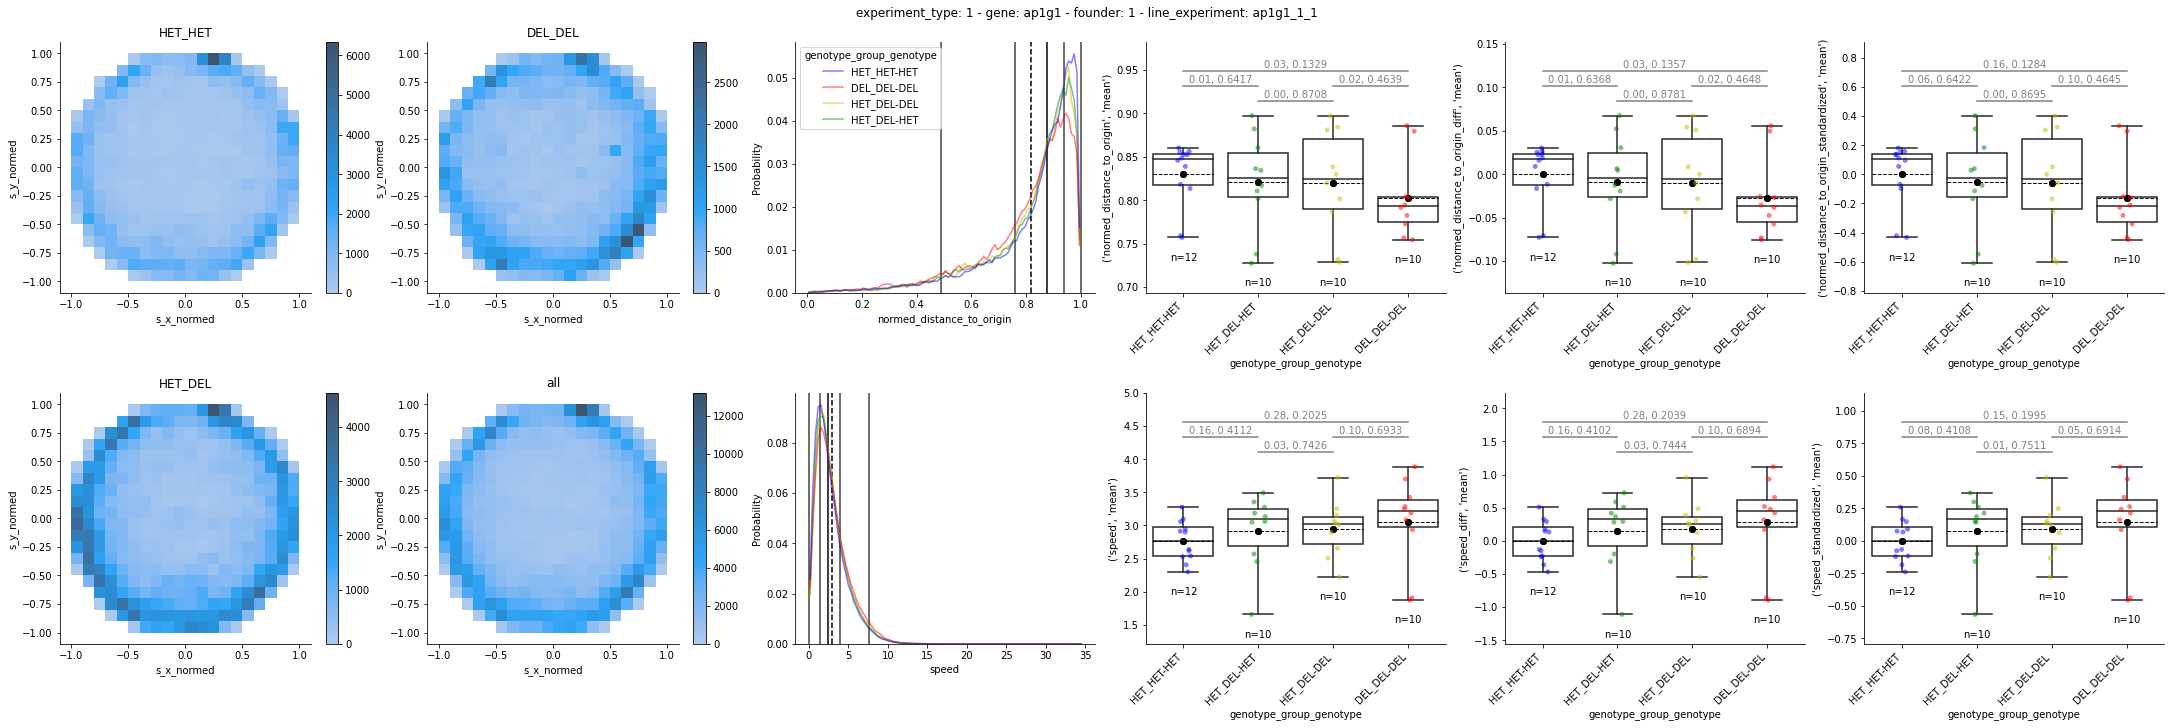

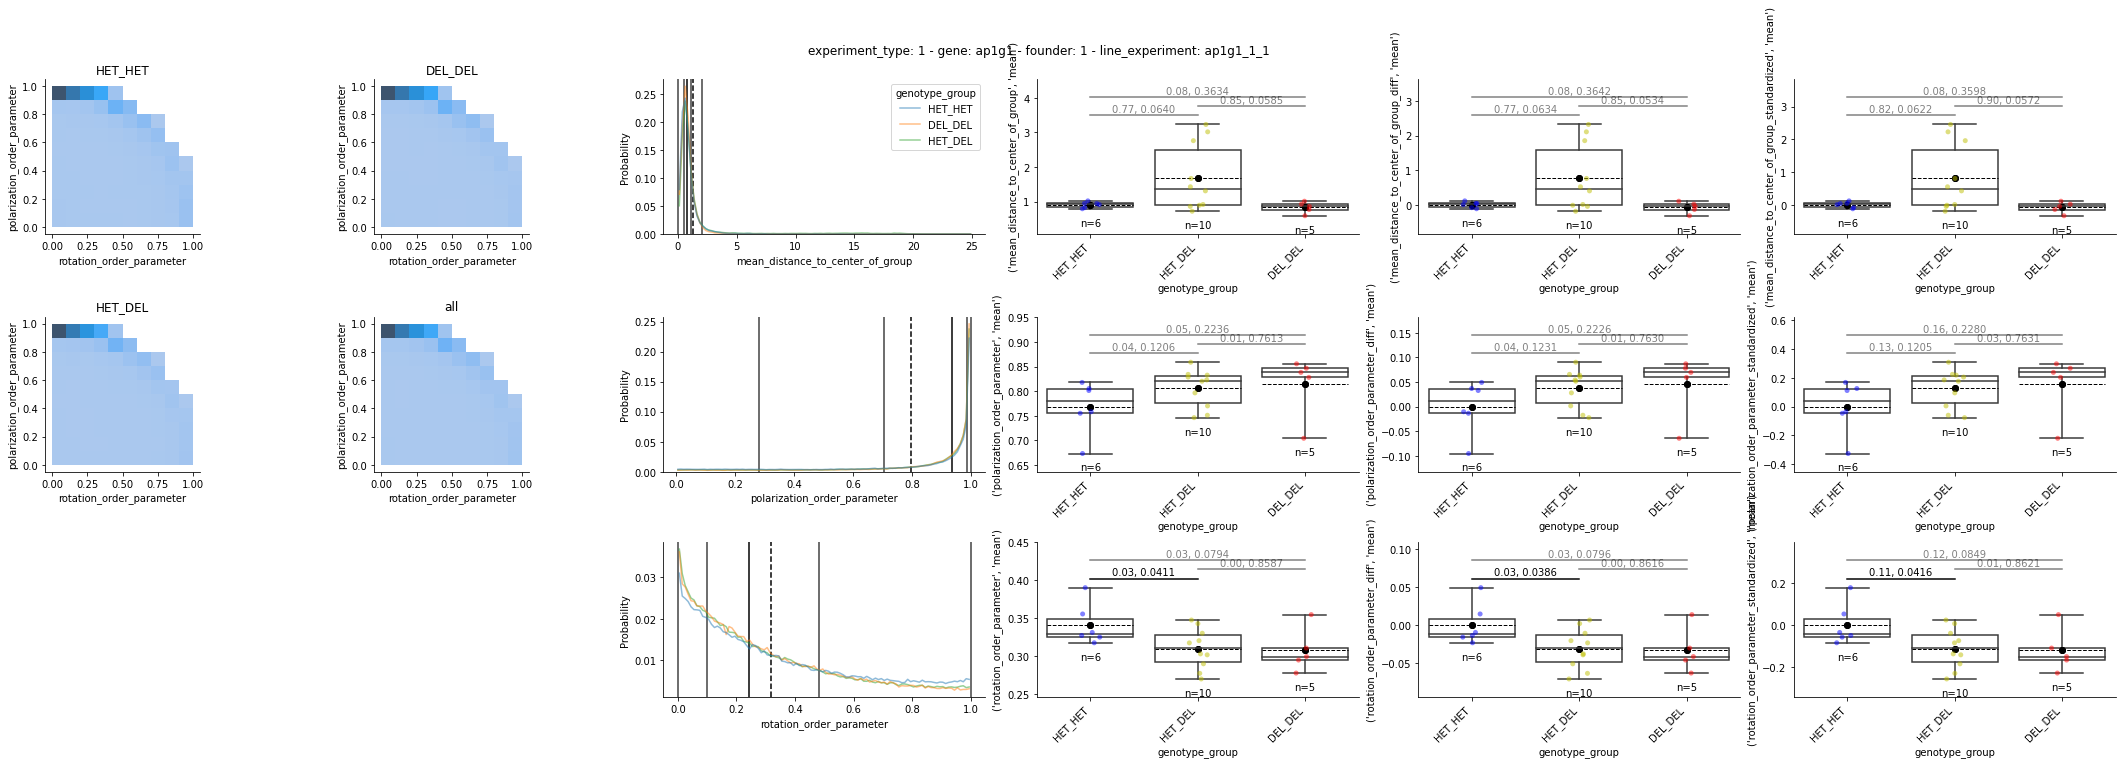

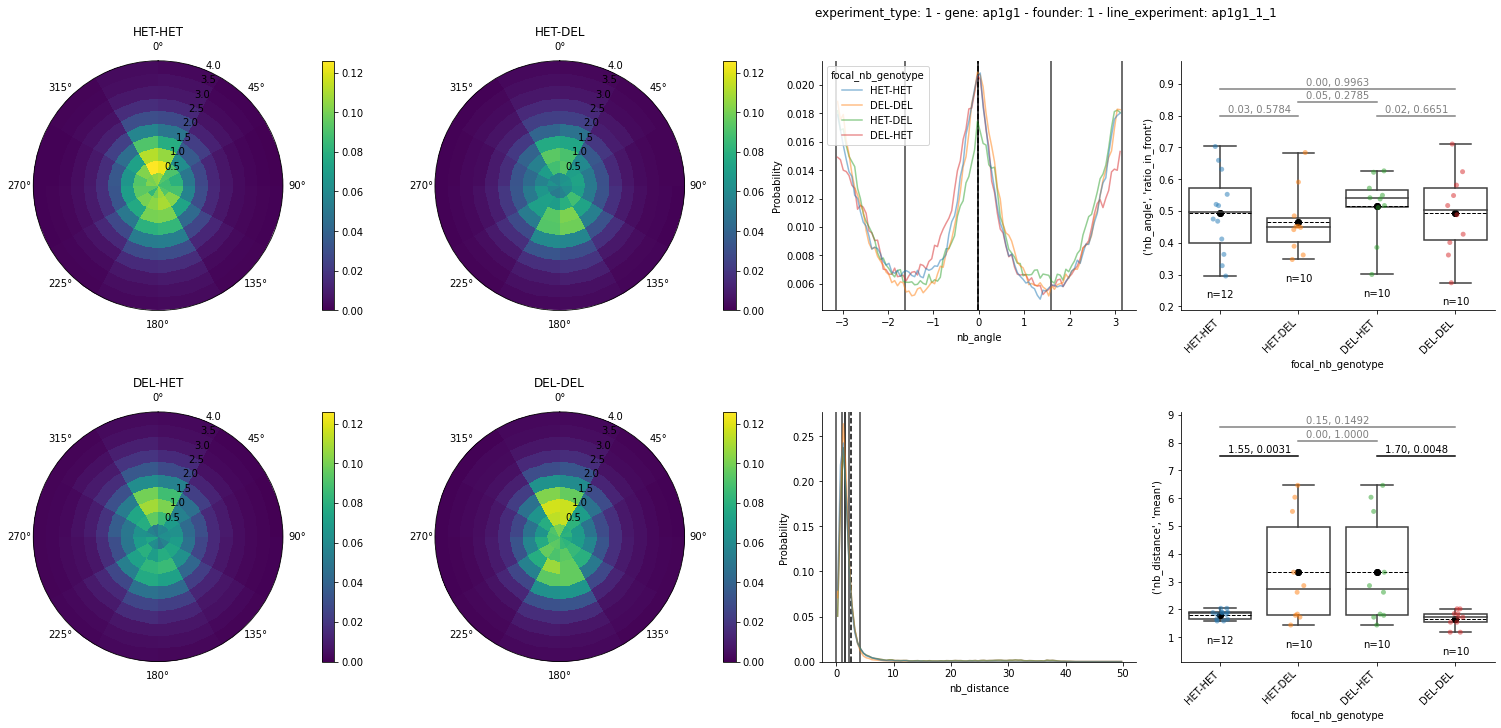

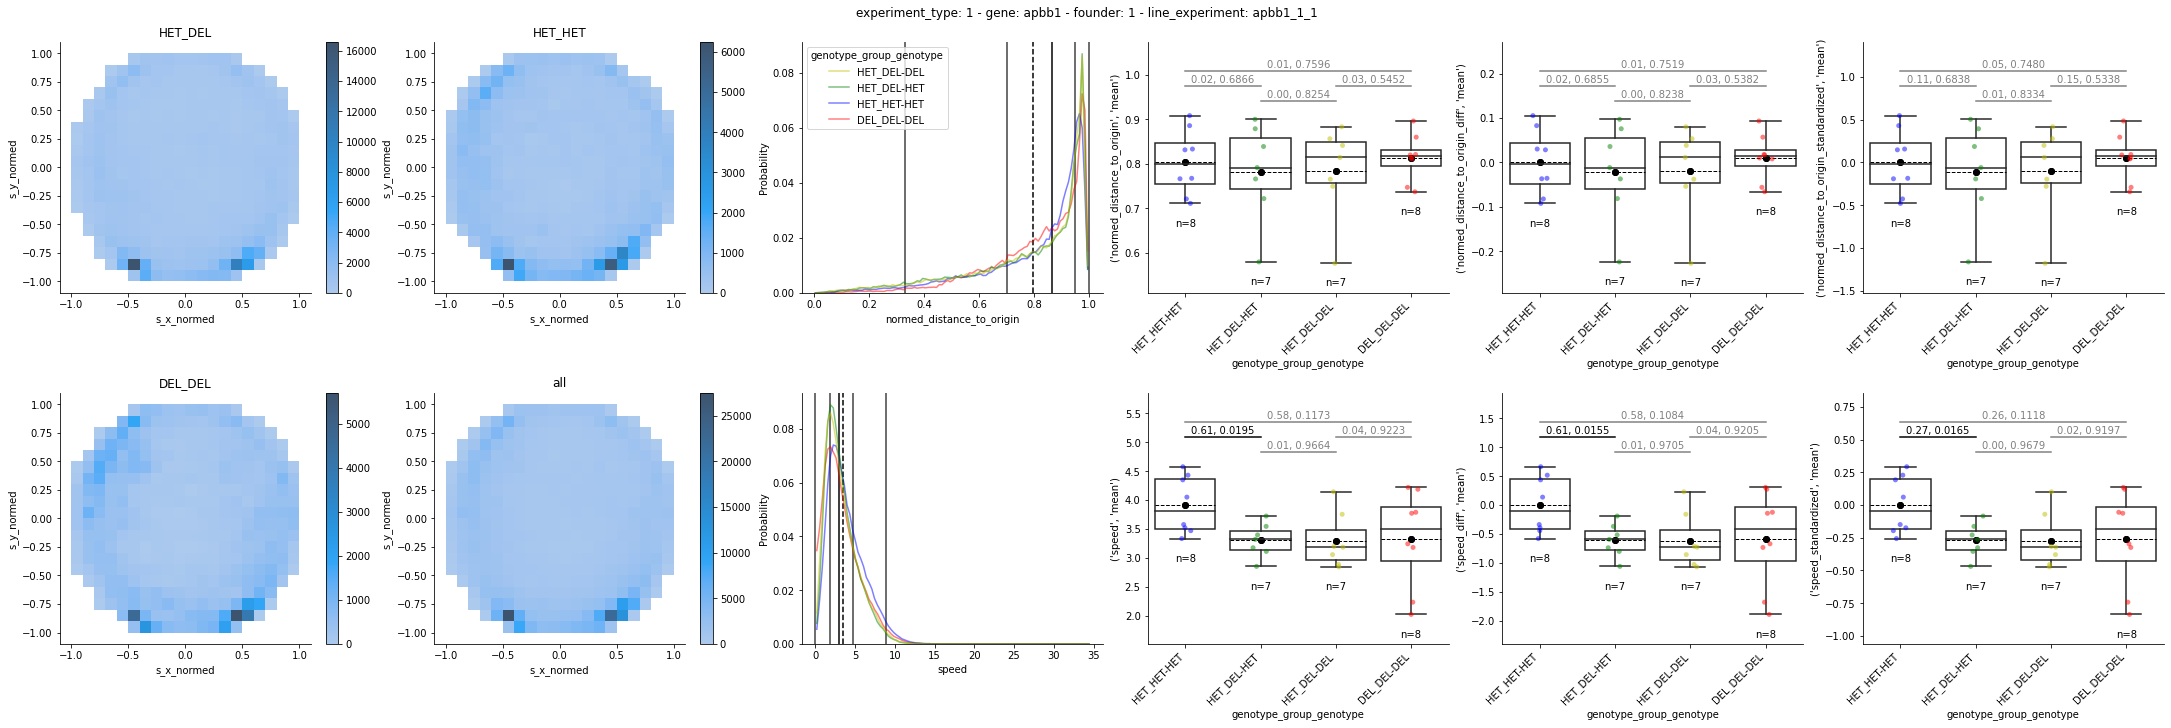

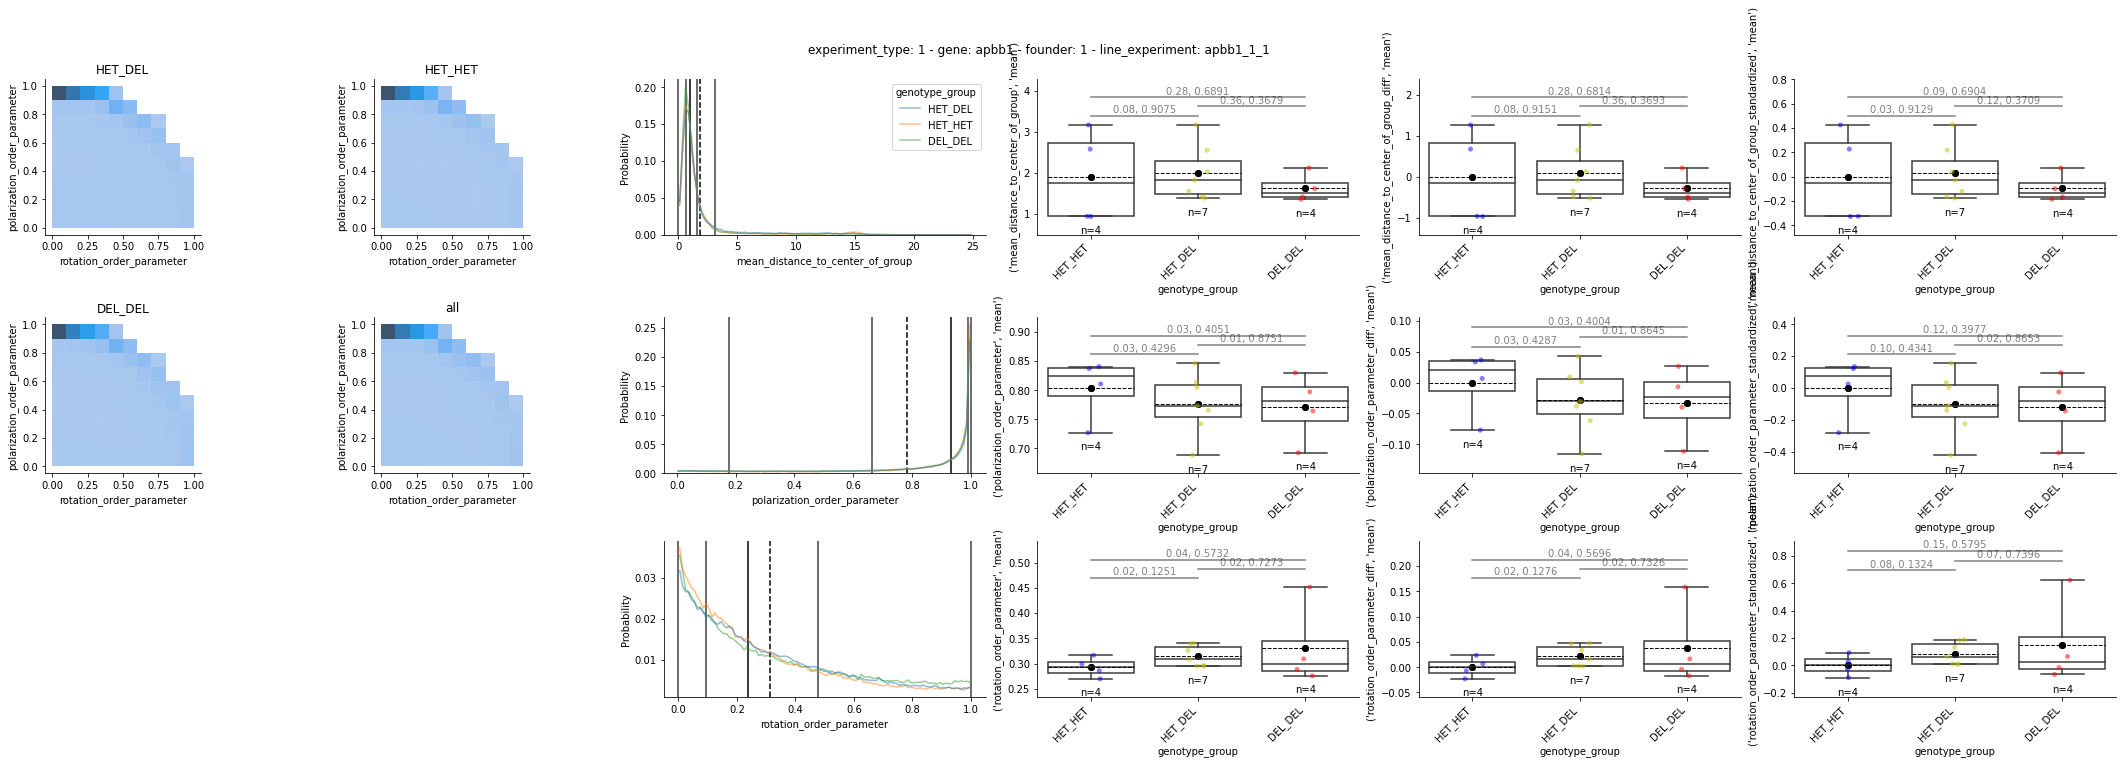

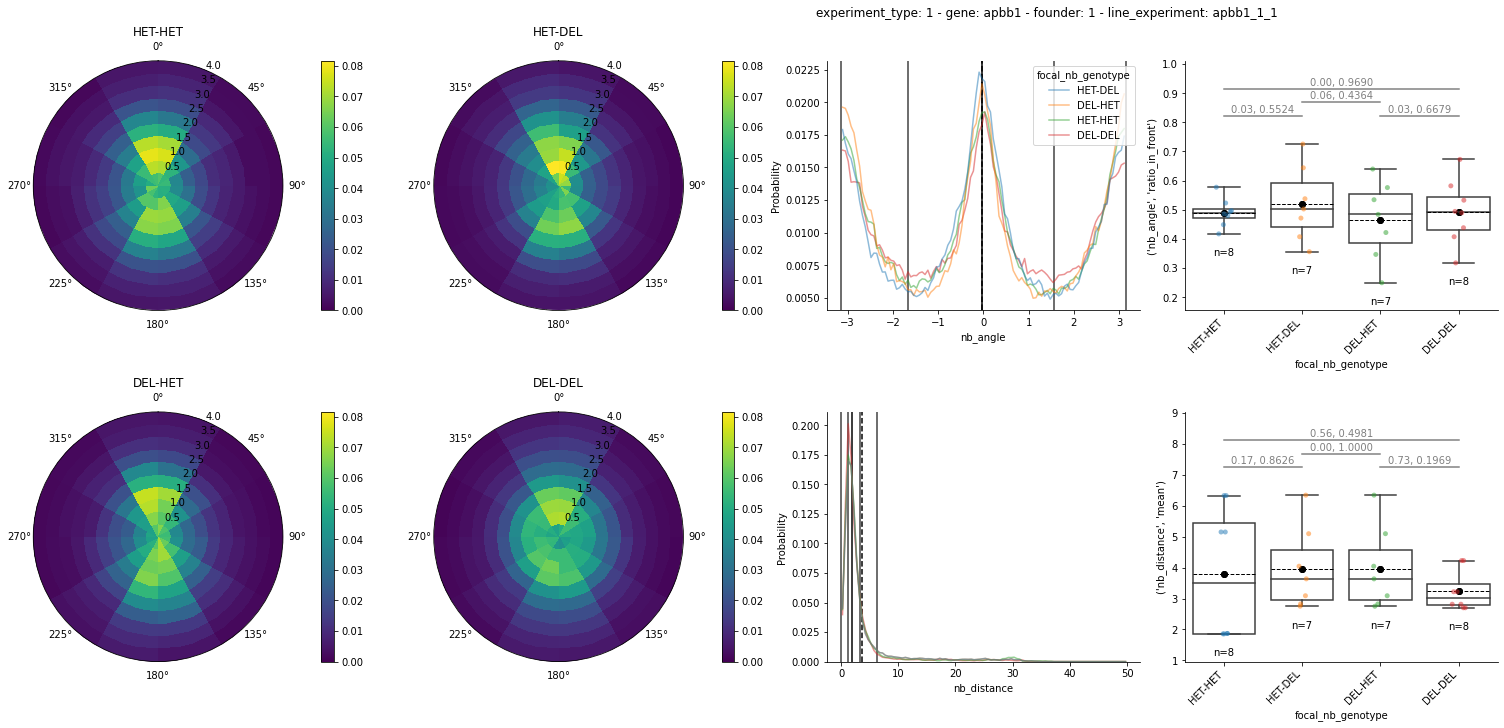

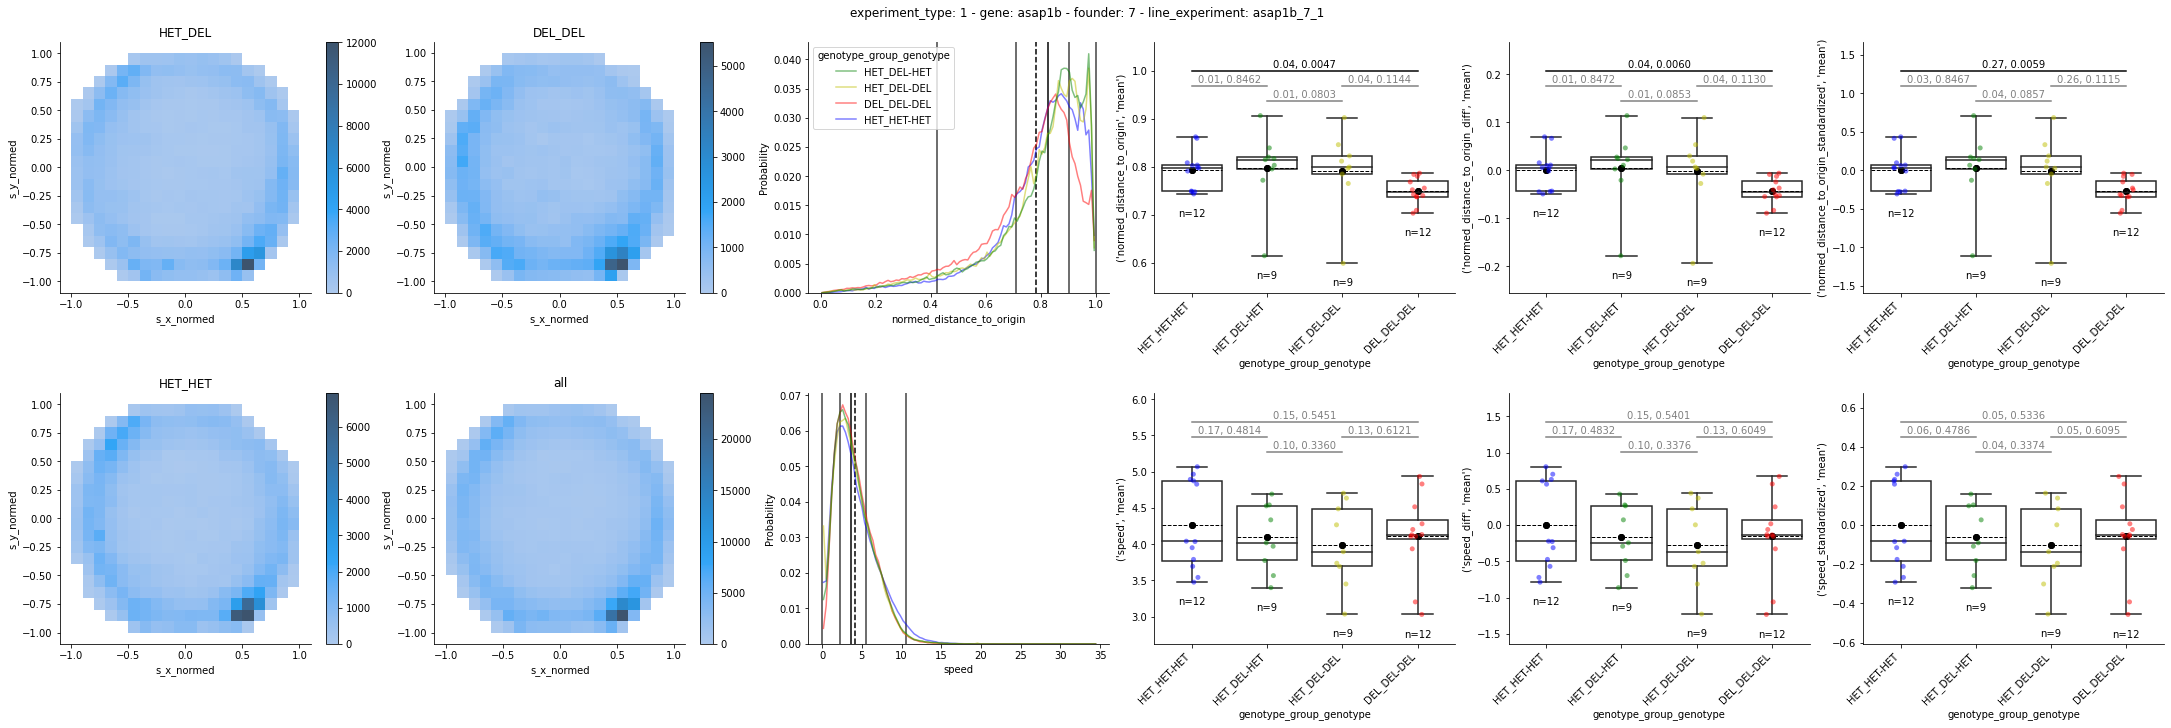

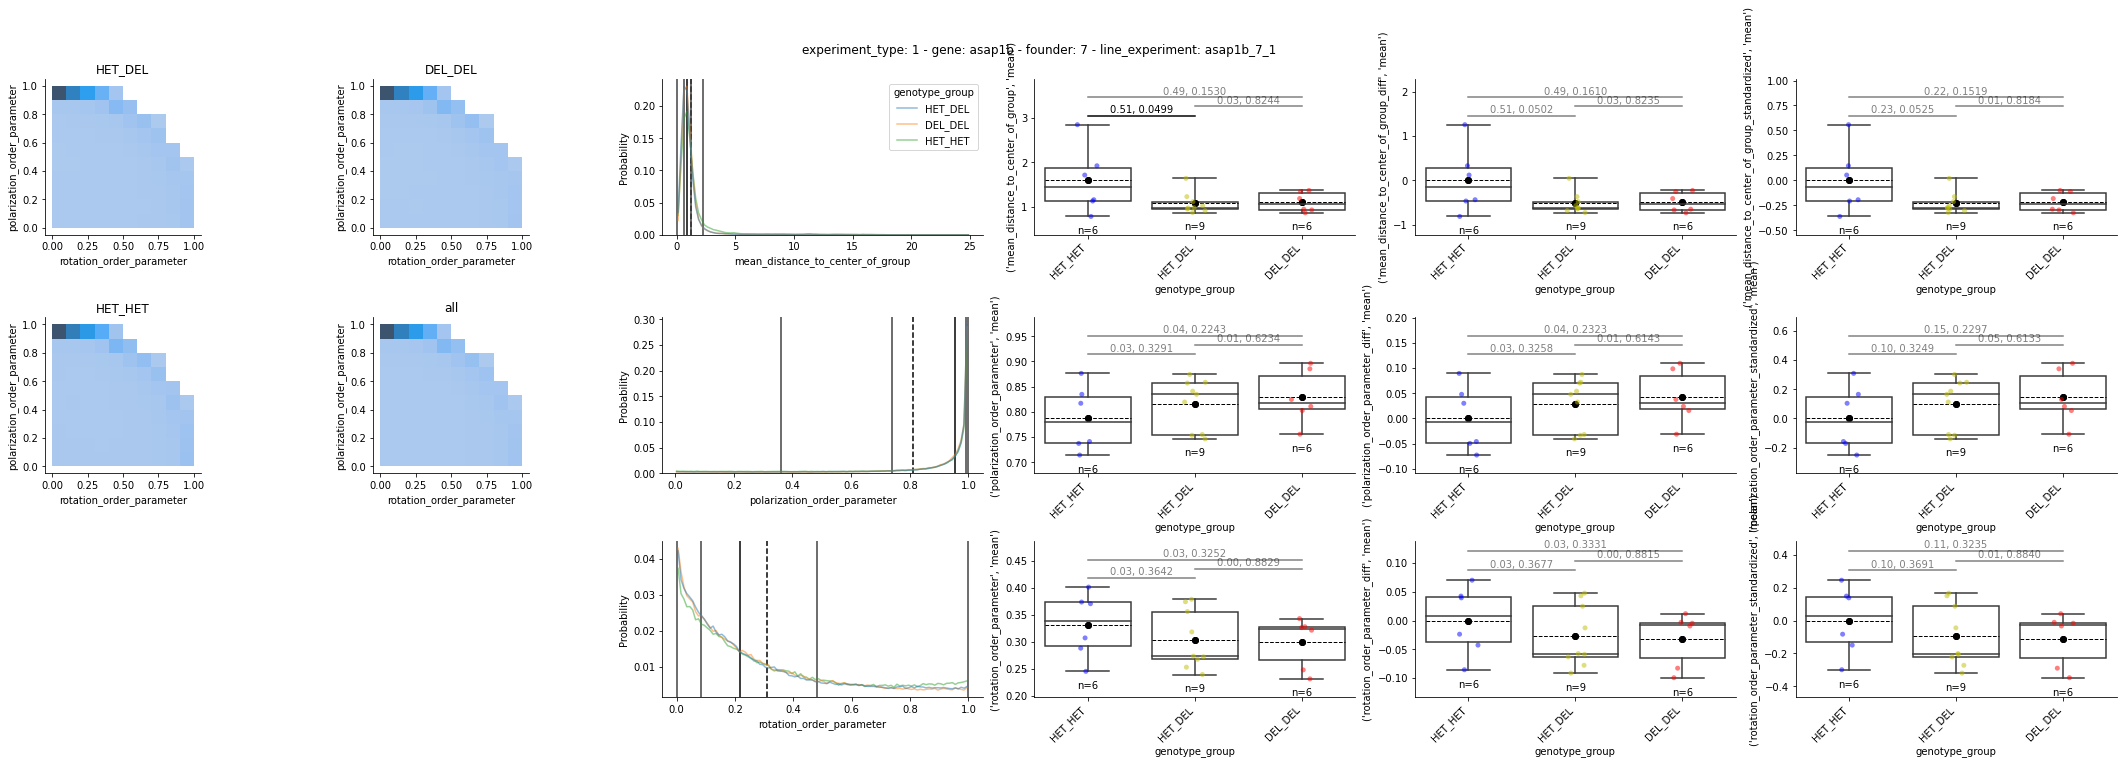

In [13]:
from mic_analysis.constants import GENERATED_FIGURES_PATH
import os 

save_path = os.path.join(GENERATED_FIGURES_PATH, f'summary_{partition_col}')
if not os.path.isdir(save_path):
    os.makedirs(save_path)

for partition in possible_partition_uids:
    assert partition_col in data_group.columns
    if partition in possible_partition_uids:
        plot_summary_partition(datasets, partition_col, partition, variables_ranges, save=True, save_path=save_path)
    else:
        print(f"Video {partition} does not exist")
        print("Possible partition_uids are")
        print(possible_partition_uids)